In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import os
os.chdir('../../')

In [2]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *

In [3]:
music21.environment.set(
    "musescoreDirectPNGPath",
    "/Applications/MuseScore 3.app/Contents/MacOS/mscore"
)

# Generate Music with Pretrained Model

### Load Pretrained

In [4]:
# Location of your midi files
# midi_path =  Path('data/midi/examples')
midi_path = Path("data/midi/primers")

# Location of saved datset
data_path = Path('data/numpy')

In [5]:
# Data
data = MusicDataBunch.empty(data_path)
vocab = data.vocab

# For Saved Data:
# data = load_data(data_path, 'musicitem_data_save.pkl')

In [6]:
pretrained_path = data_path/"models"/Path("maestro_all_model.pth")
# pretrained_path = data_path/"models"/Path("maestro_2018_model.pth")

In [52]:
# Learner
config = default_config()
learn = music_model_learner(data, pretrained_path=pretrained_path, config=config.copy())

## Prediction

#### Choose existing midi file as a starting point

In [8]:
midi_files = get_files(midi_path, recurse=True, extensions='.mid'); midi_files[:4]
# midi_files = get_files(midi_path, recurse=True, extensions=".mid"); midi_files

[PosixPath('data/midi/primers/fur_elise.mid')]

In [9]:
idx = 0
f = midi_files[idx]; f

PosixPath('data/midi/primers/fur_elise.mid')

#### NextWord/Autocomplete

Trim the song to only a few notes. Model will use these notes a seed and continue the idea

In [10]:
cutoff_beat = 10

item = MusicItem.from_file(f, data.vocab)
seed_item = item.trim_to_beat(cutoff_beat)

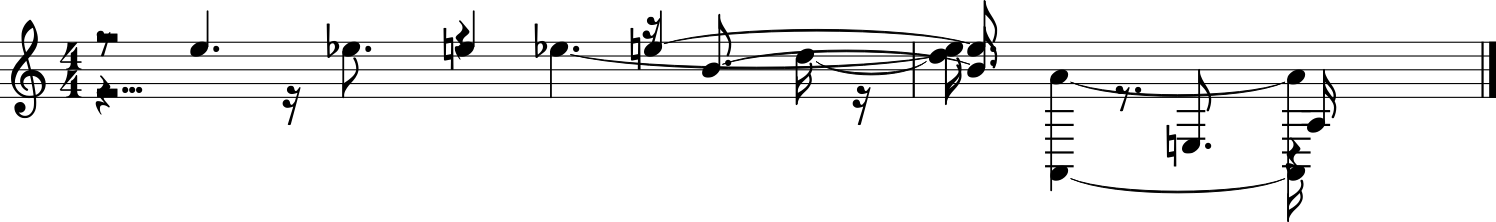

In [29]:
seed_item.show()

In [30]:
seed_item.play()

#### Use seed to predict next sequence

In [34]:
# pred, full = learn.predict(seed_item, n_words=400, temperatures=(1.1,0.4), min_bars=12, top_k=24, top_p=0.7)
pred, full = learn.predict(seed_item, n_words=400, temperatures=(0.5,0.7), min_bars=12, top_k=24, top_p=0.7)
# pred, full = learn.predict(seed_item, n_words=400)

Non midi note detected. Only returning valid portion. Index, seed 38 (184, 2)


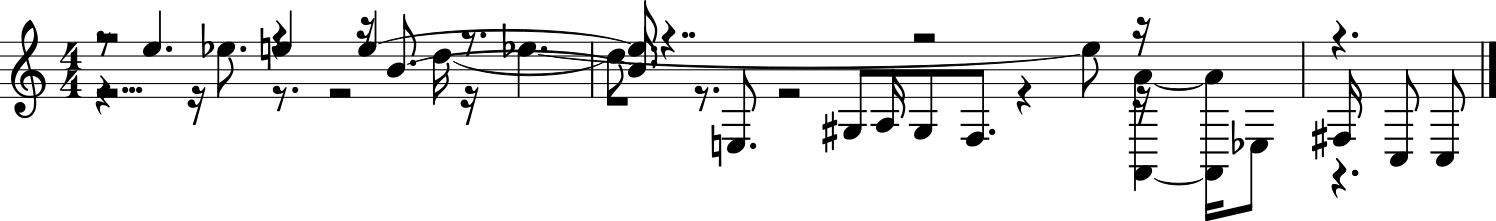

In [35]:
full.show()

In [36]:
full.play()

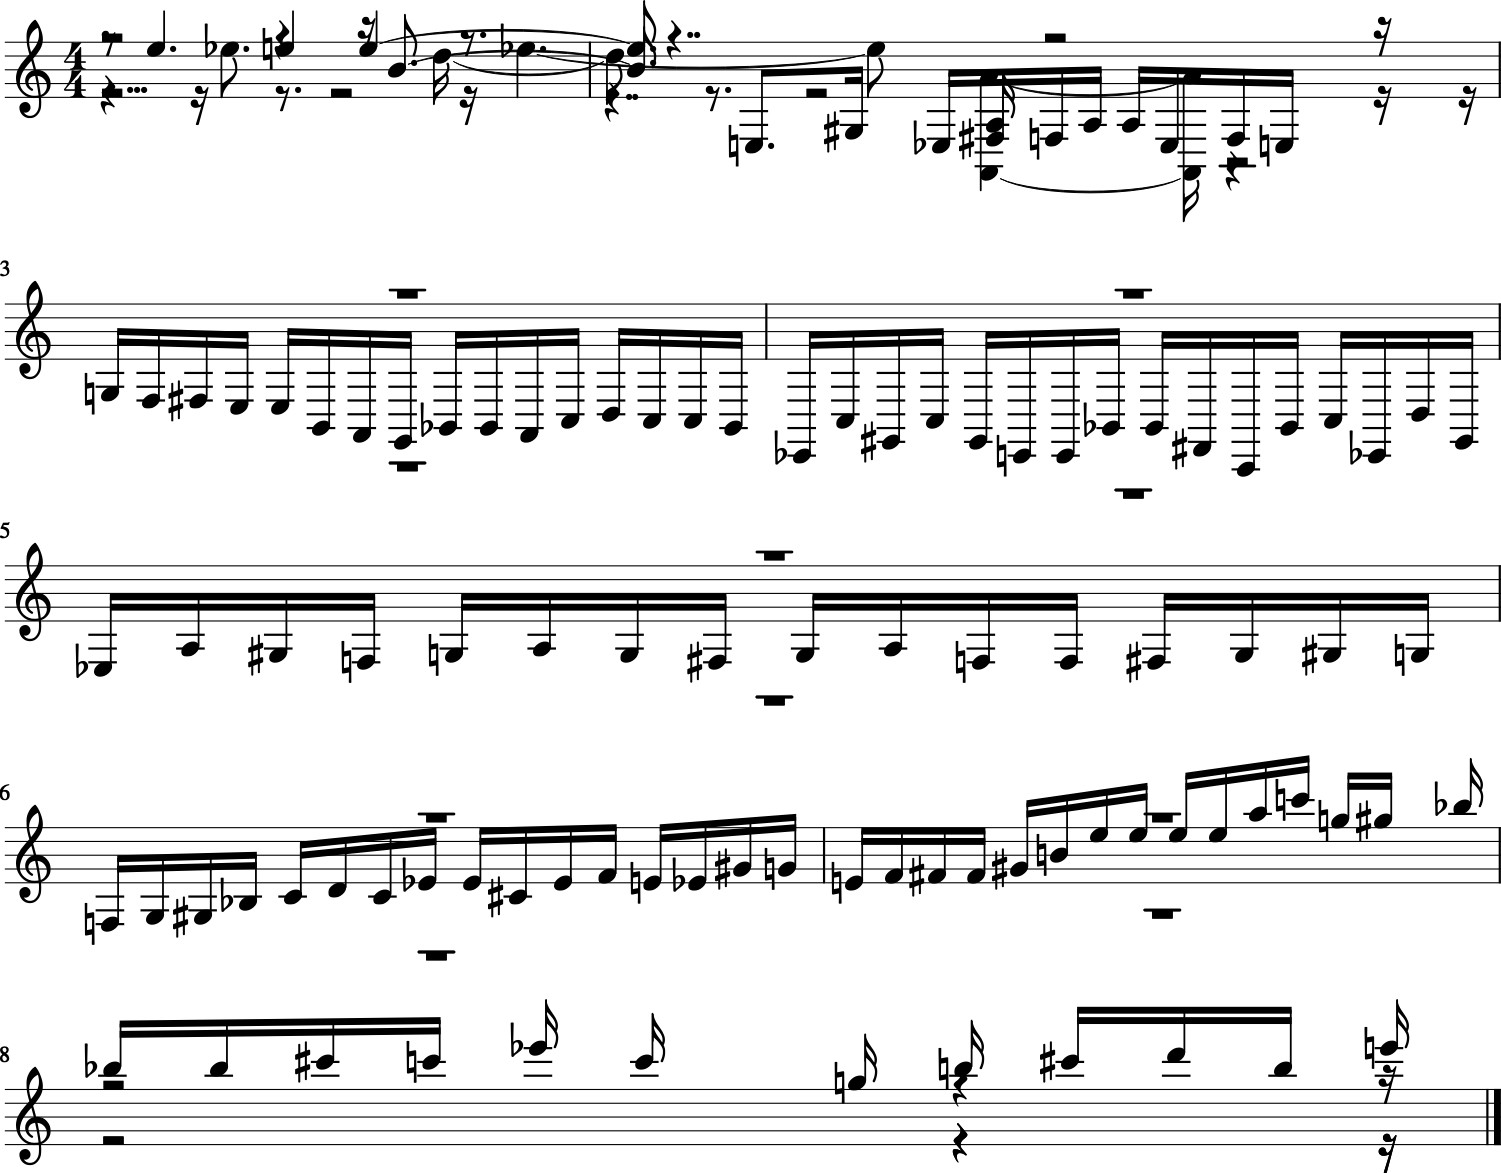

In [18]:
full_song = seed_item.append(pred); full_song.show()

In [19]:
full_song.play()

#### Add More Randomness to prediction

In [ ]:
note_temp = 1.4 # Determines amount of variation in note pitches
dur_temp = 0.8 # Amount of randomness in rhythm
top_k = 30
pred, full = learn.predict(seed_item, n_words=400, temperatures=(note_temp, dur_temp), min_bars=12, top_k=top_k, top_p=0.7)

In [ ]:
pred.show()

### Predict without primer

In [53]:
empty_item = MusicItem.empty(vocab)

In [57]:
pred, full = learn.predict(empty_item, n_words=500)

In [59]:
full.play()